## Project 3 - Time Series Forecasting
### IoTA - CSC 591 - Fall 2016
#### unity_id : avshirod (Aditya Shirode)

In [1]:
# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
from matplotlib.pylab import rcParams
import operator
import math
import sklearn.metrics as sm
import statsmodels.api as sta
from statsmodels.tsa.ar_model import AR
import os

In this project, we are given a data set and we have to perform Time Series Analysis on it.

We will choose a best model from the following three algorithms - 
<ol>
<li> Simple moving average </li>
<li> Exponential smoothing </li>
<li> Autoregression </li>
</ol>

In [2]:
# Setting up folders
dirpath = os.getcwd()
plot_path = dirpath + "/plots"

rcParams['figure.figsize'] = 15,8

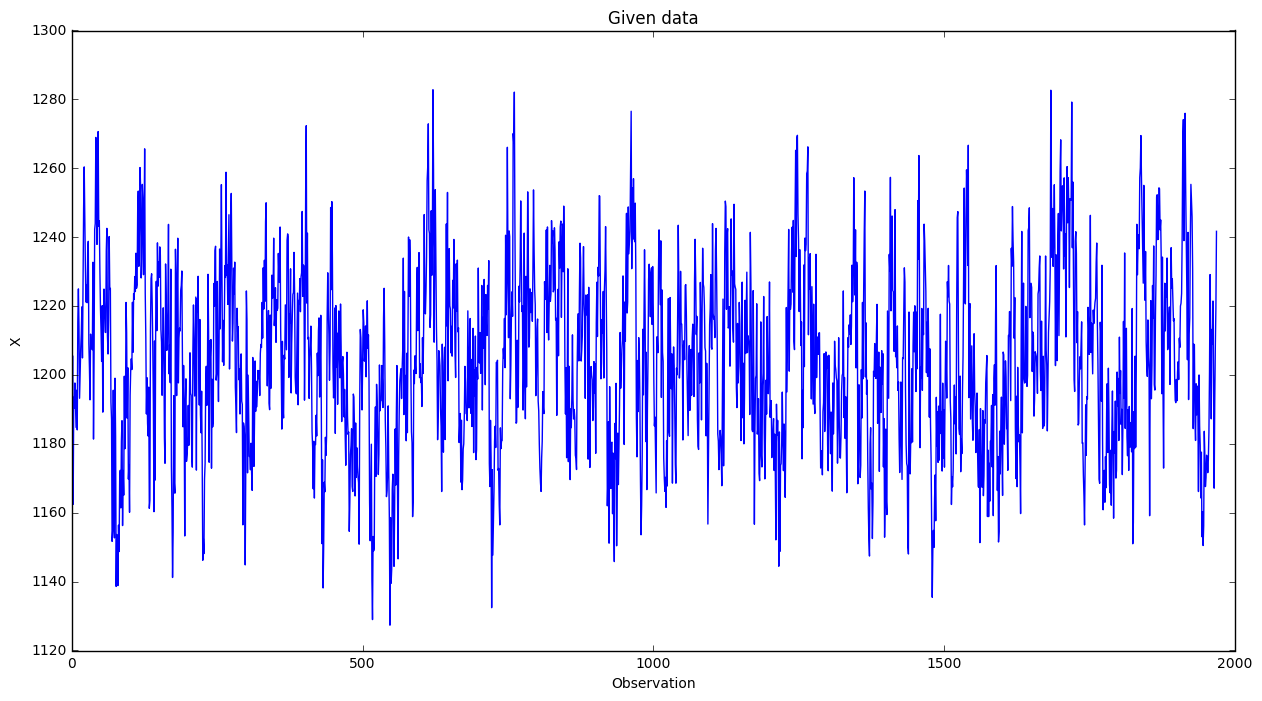

In [3]:
# Read in Data Set - 2000 Obs = First 1500 Train + Last 500 Test
filename = 'data_avshirod.csv'

data = pd.read_csv(filename)
# data.head()
# data.describe()

# Ignoring first 30 data points because of long tail
x = list(data['X'][30:])
y = range(len(x))

plt.title("Given data")
plt.xlabel("Observation")
plt.ylabel("X")
plt.plot(y,x)
plt.savefig(plot_path + '/data_points')
plt.show()

train = x[:1500]
test = x[1500:]
# Apply all models to training data set

After ignoring the tail at the start of data, and plotting the rest of it,
we see that there is no observable pattern in the data.
The data looks noisy and stationary.

There is no clear trend, or seasonality visible. There might be a cyclicity present, but that needs to be tested.


## Task 1 - Simple Moving Average

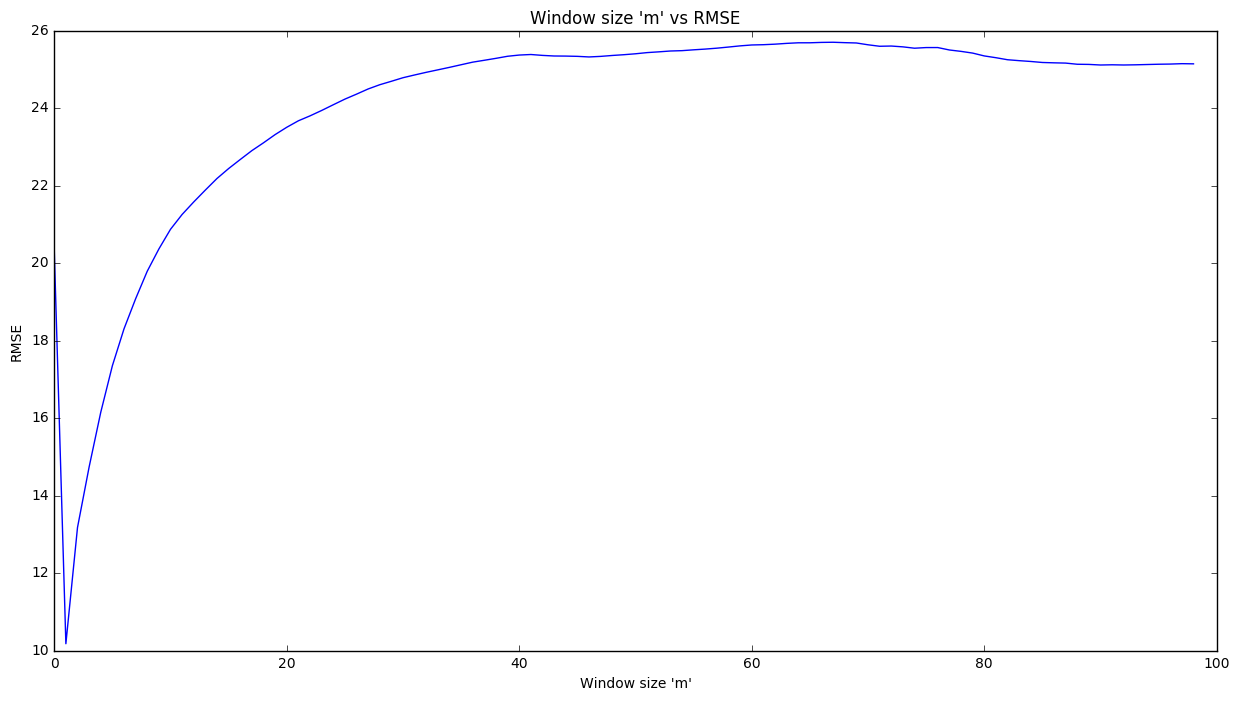

Lowest RMSE = 10.17476930189807 	 for 'm' = 2


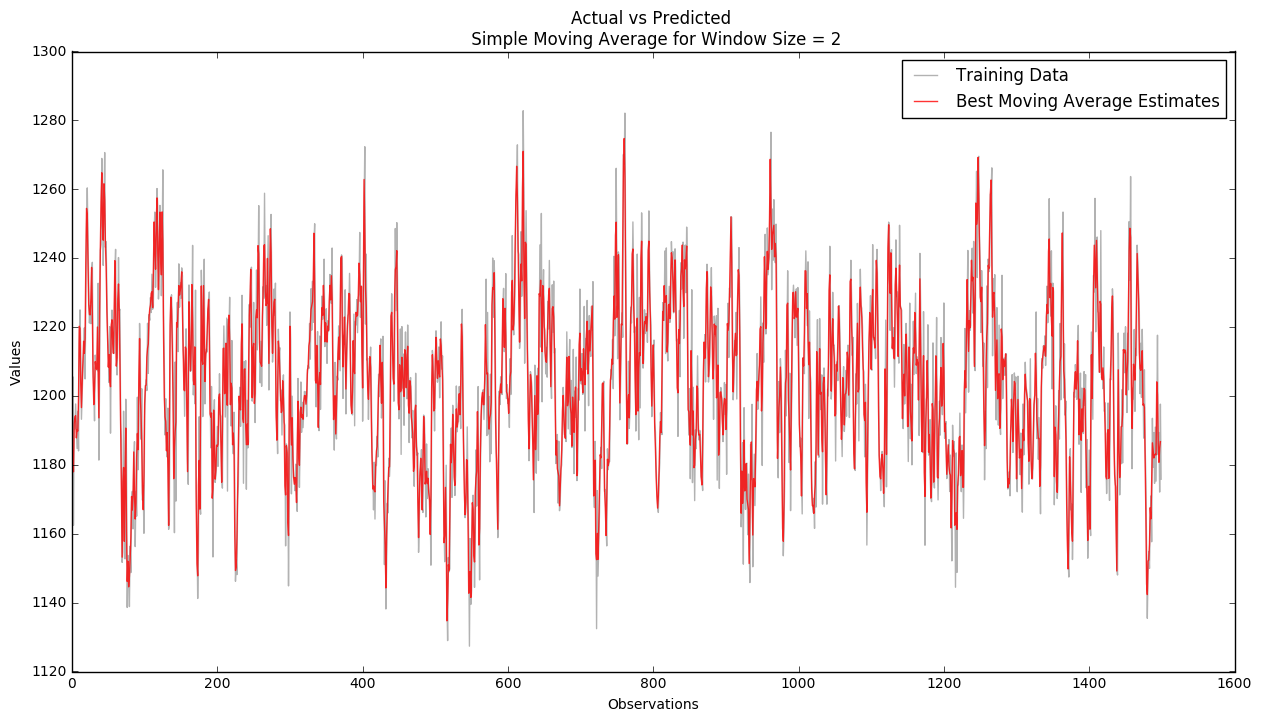

In [4]:
# Task 1 - Simple Moving Average
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

# Calculate Error and RMSE
def calcSMA(data, window):
    weights = np.repeat(1.0, window)/window
    moving_avg = np.convolve(data, weights, 'valid')
    # moving_avg = moving_average(data, window)
    # error = list(map(operator.sub, data[window:], moving_avg[:-1]))
    # rmse = np.sqrt(np.array([e ** 2 for e in error]).mean())
    if window == 1:
        error = np.array(data[window:]) - np.array(moving_avg[:-1])
    else:
        error = np.array(data[window-1:]) - np.array(moving_avg)
    rmse = np.sqrt((error**2).mean())
    return error, rmse

'''
# Setting default window size = 80
window = 80
error_first, rmse_first = calcSMA(train, window)
print("RMSE = {} \t for window size (m) = {}".format(rmse_first, window))
plt.title("Simple Moving Average for Window Size = " + str(window))
plt.xlabel("Observations")
plt.ylabel("Errors")
plt.plot(error_first, c = 'blue', alpha = 0.8, label = "Errors")
plt.show()
plt.clf()
'''

# Vary value of 'm' and calculate again
ma_errors = []
ma_rmse = []
for m in range(1,100):
    error_temp, rmse_temp = calcSMA(train, m)
    ma_errors.append(error_temp)
    ma_rmse.append(rmse_temp)

# Plot RMSE vs 'm'
plt.title("Window size 'm' vs RMSE")
plt.xlabel("Window size 'm'")
plt.ylabel("RMSE")
plt.plot(ma_rmse)
plt.savefig(plot_path + '/ma_rmse_vs_m')
plt.show()
plt.clf()

# Select m based on the lowest RMSE value
best_m = ma_rmse.index(min(ma_rmse)) + 1
best_ma_rmse = min(ma_rmse)
print("Lowest RMSE = {} \t for 'm' = {}".format(best_ma_rmse,best_m))

# For the best value of m, plot the predicted values against the original values
# best_weights = np.repeat(1.0, best_m)/best_m
# best_moving_avg = np.convolve(train, best_weights, 'valid')
best_moving_avg = moving_average(train, best_m)

plt.title("Actual vs Predicted \n Simple Moving Average for Window Size = " + str(best_m))
plt.xlabel("Observations")
plt.ylabel("Values")
plt.plot(train, c = 'gray', alpha = 0.6, label = "Training Data")
plt.plot(best_moving_avg, c = 'red', alpha = 0.8, label = "Best Moving Average Estimates")
plt.legend()
plt.savefig(plot_path + '/act_vs_pred_MA')
plt.show()
# plt.savefig(plt_path)
plt.clf()

#### Results : Moving Average
A moving average model is usually used to model a time series that shows short term dependencies between successive observations.

For training data, we run the function for *Moving Average* `calcSMA()` with values of *m* varying from *1 to 100*.

We find out that the best **RMSE** (the *minimum* value), which is **10.174769** for **m=2**.

Plotting the actual values against predicted values by using m=2 gives us the above graph. We can see that the predicted values (**in RED**) follow the actual values (**in GRAY**) very closely.
This indicates that the model might be a good fit.

## Task 2 - Exponential Smoothing

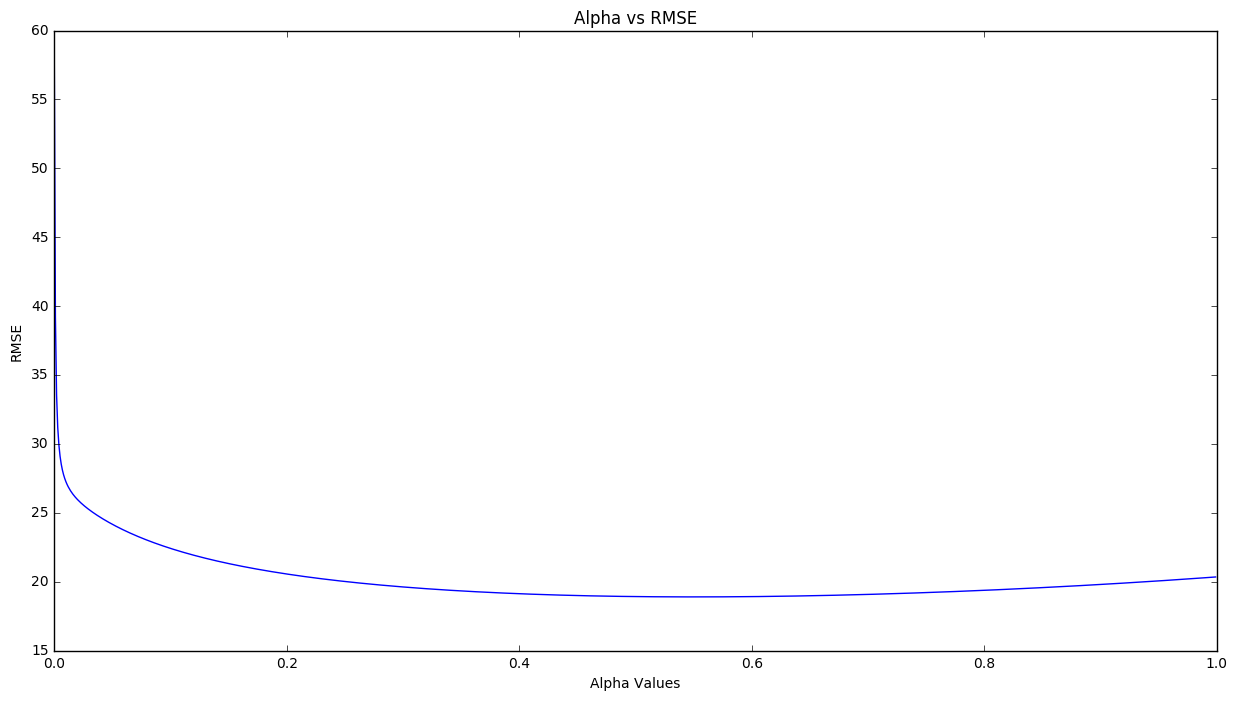

Min RMSE = 18.8899650330795 	 for Alpha = 0.55


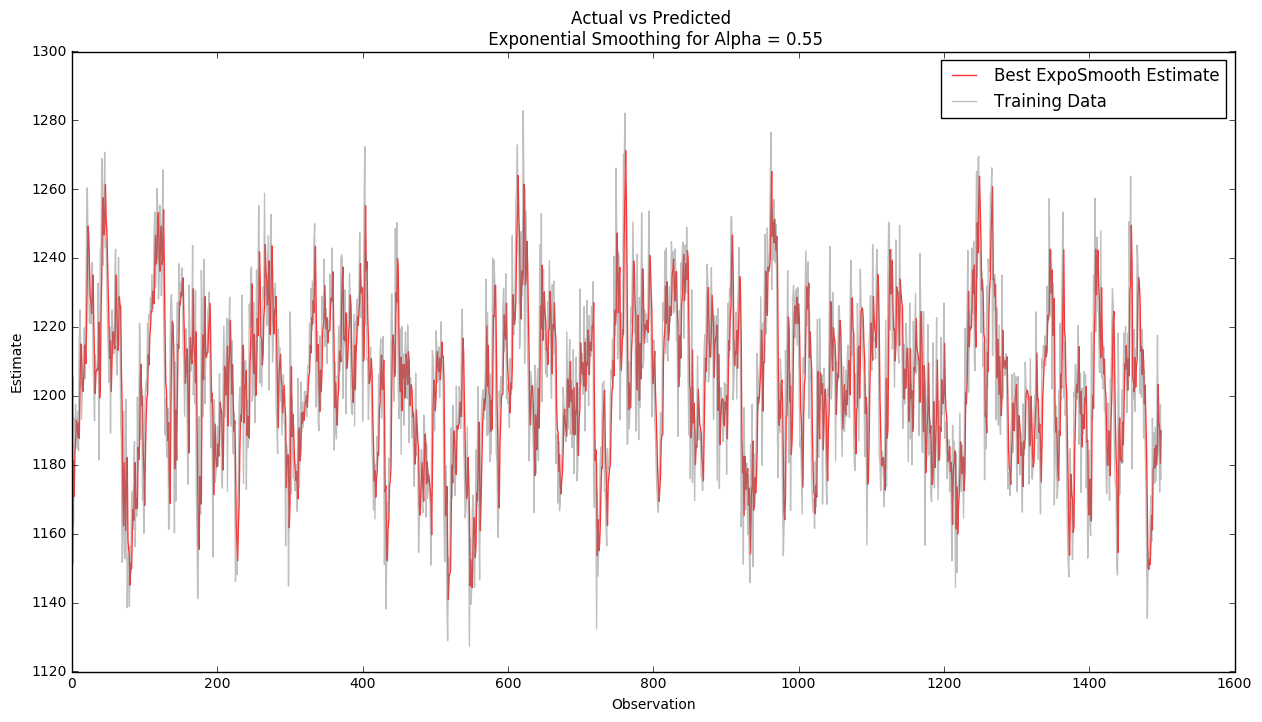

In [5]:
# Task 2 - Exponential Smoothing
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n-1] + (1 - alpha) * result[n-1])
    return result

def es_res(x, alpha):
    exp_smooth = exponential_smoothing(x, alpha)
    rmse = math.sqrt(sm.mean_squared_error(x, exp_smooth))
    return exp_smooth, rmse

'''
alpha = 0.5
exp_smooth_first, rmse_first = es_res(train, alpha)
print("RMSE = {} \t for Alpha = {}".format(rmse_first, alpha))
plt.title("Exponential Smoothing for Alpha = " + str(alpha))
plt.xlabel("Observation")
plt.ylabel("Estimate")
plt.plot(exp_smooth_first, c='blue', label = "ExpoSmooth Estimate")
plt.plot(train, c='gray', alpha = 0.5, label = "Training Data")
plt.legend()
plt.savefig(plot_path + '/es_alpha_5')
plt.show()
plt.clf()
'''

# Vary value of 'alpha' and calculate again
# Calculate Error and RMSE
es_errors = []
es_rmse = []
step = 1/1000
for alpha in np.arange(0,1,step):
    error_temp, rmse_temp = es_res(train, alpha)
    es_errors.append(error_temp)
    es_rmse.append(rmse_temp)
    
# Plot RMSE vs 'alpha'
plt.title("Alpha vs RMSE")
plt.xlabel("Alpha Values")
plt.ylabel("RMSE")
plt.plot(np.arange(0,1,step), es_rmse)
plt.savefig(plot_path + '/es_rmse_vs_alpha')
plt.show()
plt.clf()

# Select 'alpha' based on the lowest RMSE value
best_alpha = es_rmse.index(min(es_rmse)) * step
best_es_rmse = min(es_rmse)
print("Min RMSE = {} \t for Alpha = {}".format(best_es_rmse,best_alpha))

# For the best value of 'alpha', plot the predicted values against the original values
best_exp_smooth = exponential_smoothing(train, best_alpha)
best_rmse = math.sqrt(sm.mean_squared_error(train, best_exp_smooth))
plt.title("Actual vs Predicted \n Exponential Smoothing for Alpha = " + str(best_alpha))
plt.xlabel("Observation")
plt.ylabel("Estimate")
plt.plot(best_exp_smooth, c='red', alpha = 0.8, label = "Best ExpoSmooth Estimate")
plt.plot(train, c='gray', alpha = 0.5, label = "Training Data")
plt.legend()
plt.savefig(plot_path + '/act_vs_pred_ES')
plt.show()
plt.clf()

#### Results : Exponential Smoothing
Exponential smoothing accounts for the seasonality in the data (which we did not see much in the first plot).

For given training data, we run our *Exponential Smoothing* function `es_res()` with varying values of alpha (*0 < alpha < 1*), with step of *0.001*.

We find that our best **RMSE** (the minimum value), which is **18.889965**, occurs for **alpha = 0.55**.

This alpha value indicates that the prediction weight is nearly equally split between observed and predicted values in the calculation of exponential smoothing.

The plot of actual vs estimated values tells us that this model is a close fit, but not good enough as the Moving Average model.

## Task 3 - AutoRegression

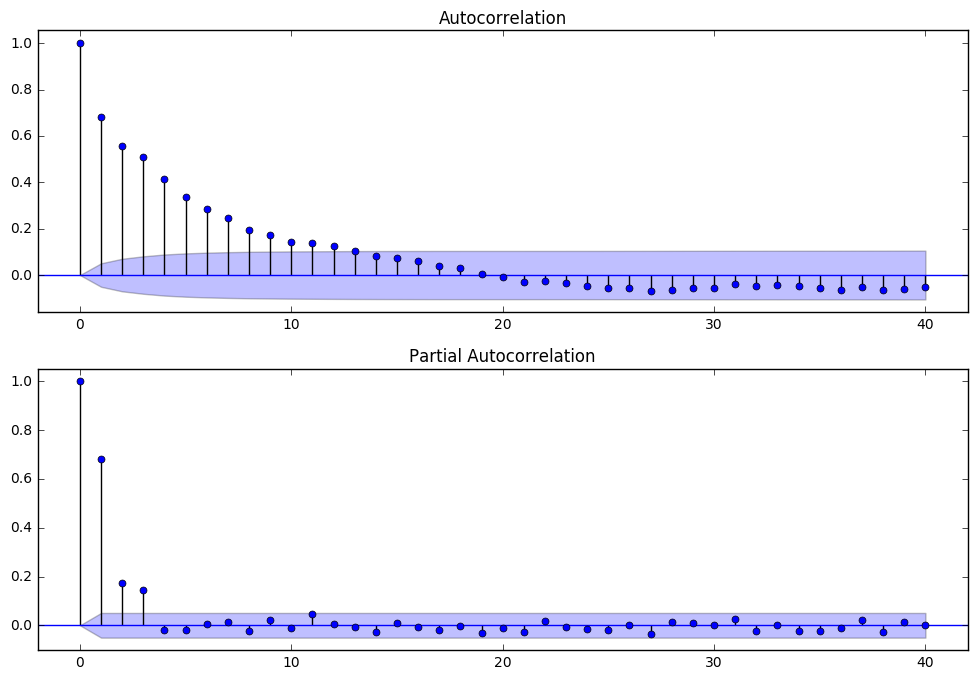

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1500
Model:                     ARMA(3, 0)   Log Likelihood               -6479.698
Method:                       css-mle   S.D. of innovations             18.185
Date:                Fri, 04 Nov 2016   AIC                          12969.395
Time:                        18:48:24   BIC                          12995.962
Sample:                             0   HQIC                         12979.292
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1203.6173      2.102    572.685      0.000      1199.498  1207.737
ar.L1.y        0.5392      0.026     21.080      0.000         0.489     0.589
ar.L2.y        0.0881      0.029      3.023      0.0

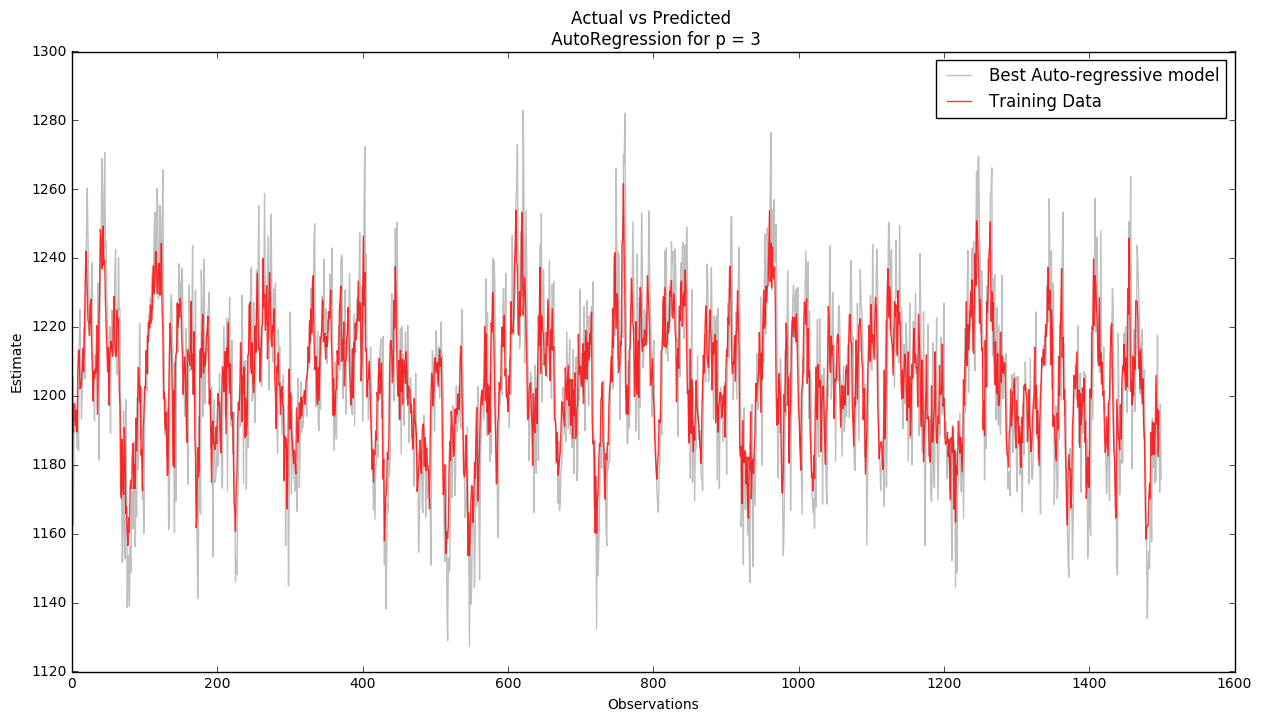

In [6]:
# Task 3 - AutoRegression
def auto_reg(data, p):
    ar_model = AR(data)
    ar_fit = ar_model.fit(p)
    ar_predict = ar_fit.predict(p)
    rmse = math.sqrt(sm.mean_squared_error(data[p:], ar_predict))
    return ar_model, ar_predict, rmse

ar_model = AR(train)

# Apply AR(p)
p = 1
first_ar_model, first_ar_predict, first_ar_rmse = auto_reg(train, p)

# Select p by plotting the partial autocorelation function.
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sta.graphics.tsa.plot_acf(train, lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sta.graphics.tsa.plot_pacf(train, lags = 40, ax=ax2)
plt.savefig(plot_path + '/ar_pacf')
plt.show()
plt.clf()

# Inferring from the graphs above - 
# As the lags in Autocorrelation are positive and decreasing, Autoregression is a good fit for the given data
# We can significant values for the first 3 lags in the PACF plot. Hence, we choose p=3.

best_p = 3
# Estimate the parameters of the AR(p) model
temp_model = sta.tsa.ARMA(train, order=(best_p,0)).fit()
print(temp_model.summary())

# Durbin-Watson
# print("Durbin-Watson Test = {}".format(sta.stats.durbin_watson(temp.resid)))

best_ar_model, best_ar_predict, best_ar_rmse = auto_reg(train, best_p)

# Provide RMSE value and a plot the predicted values against the original values
# best_ar_rmse = math.sqrt(sm.mean_squared_error(train[best_p:], pred_ar_fit))
print("RMSE = {}".format(best_ar_rmse))

fig, ax = plt.subplots(figsize=(15,8))
ax = plt.plot(train, alpha = 0.5, c='gray', label = "Best Auto-regressive model")
fig = plt.plot(best_ar_predict, alpha = 0.8, c='red', label = "Training Data")
plt.title("Actual vs Predicted \n AutoRegression for p = " + str(best_p))
plt.xlabel("Observations")
plt.ylabel("Estimate")
plt.legend()
plt.savefig(plot_path + '/act_vs_pred_AR')
plt.show()
plt.clf()

#### Results : Auto-regression
An auto-regressive model is usually used to model time series which show longer term dependencies between successive observations.

For given training data, we run an initial AR(p) with p=1, just to see the result it produces. 

After that, we display the **ACF** and **PACF** plots.

Inferring from the graphs above - 
As the lags in Autocorrelation are positive and decreasing, Autoregression seems like a good fit for the given data.
We can significant values for the first *3 lags* in the PACF plot. Hence, we choose **p=3**.

When we print the summary of this model **`AR(3)`**, we see that the p-values for all the variables are very low (< 0.05).
The **RMSE** value is **18.132966**.

The plot of actual vs predicted values seems reasonably good.

## Testing the models

In [7]:
# Run all three models on the test data, and chose the best one.

test_ma_error, test_ma_rmse = calcSMA(test, best_m)
test_es_error, test_es_rmse = es_res(test, best_alpha)
test_ar_model, test_ar_predict, test_ar_rmse = auto_reg(test, best_p)

train_rmse = [best_ma_rmse, best_es_rmse, best_ar_rmse]
test_rmse = [test_ma_rmse, test_es_rmse, test_ar_rmse]

print("RMSE for Models on Training Data set = ", train_rmse)
print("RMSE for Models on Testing  Data set = ",test_rmse)

RMSE for Models on Training Data set =  [10.17476930189807, 18.8899650330795, 18.132966520501213]
RMSE for Models on Testing  Data set =  [10.185495936739615, 18.92586219740564, 18.347051798522845]


#### Results : Test Data

After running the three models on test data set, we get the above results.

Here you can see that the RMSE for the **Moving Average** model is the lowest for both data sets.

This in a way contradicts with our initial assumption. We assumed that our data was stationary with some noise.

But as seen from results above, the Moving Average model is the best fit for the data. This means the data has some inherent trend in it.
The results do not show any cyclicity (or seasonality) which we had expected.

With some context about the data, and what is the background relation between values, we can decide which model is the best fit and why.